In [8]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
from functools import lru_cache

In [9]:
username = "DublinBikesApp"
password = "dublinbikesapp"
endpoint = "dublinbikesapp.cynvsd3ef0ri.us-east-1.rds.amazonaws.com"
port = "3306"
db = "DublinBikesApp"

engine = create_engine("mysql+mysqlconnector://{}:{}@{}:{}/{}".format(username, password, endpoint, port, db), echo=False)

In [10]:
n= 41

sql =  f"""
SELECT number, last_update, avg(available_bike_stands), avg(available_bikes) FROM DublinBikesApp.dynamicData
where number = {n}
group by number, day(last_update)
order by number, last_update asc;
"""

print(sql)


SELECT number, last_update, avg(available_bike_stands), avg(available_bikes) FROM DublinBikesApp.dynamicData
where number = 41
group by number, day(last_update)
order by number, last_update asc;



In [11]:
df = pd.read_sql_query(sql, engine)

In [12]:
df

,number,last_update,avg(available_bike_stands),avg(available_bikes)
0,41,2021-03-01 01:07:26,11.7600,8.0655
1,41,2021-03-02 00:09:23,13.5903,6.2639
2,41,2021-03-03 00:09:50,15.5123,4.4877
3,41,2021-03-04 00:02:05,12.7083,7.2917
4,41,2021-03-05 00:02:50,11.2587,8.7413
5,41,2021-03-06 00:01:29,10.5382,9.4618
6,41,2021-03-07 00:01:41,17.1045,2.8955
7,41,2021-03-08 00:06:27,13.9615,5.7797
8,41,2021-03-09 00:00:17,9.2091,10.4634
9,41,2021-03-10 00:03:25,13.3554,6.6446


<AxesSubplot:xlabel='last_update'>

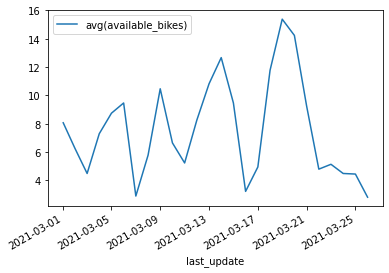

In [13]:
df.plot(x='last_update', y='avg(available_bikes)')

In [14]:
sql =  f"""
SELECT number, last_update, available_bike_stands, available_bikes FROM DublinBikesApp.dynamicData
where number = {n}
"""
df = pd.read_sql_query(sql, engine)

In [15]:
df

,number,last_update,available_bike_stands,available_bikes
0,41,2021-03-01 01:07:26,11,9
1,41,2021-03-01 01:17:33,11,9
2,41,2021-03-01 01:17:33,11,9
3,41,2021-03-01 01:17:33,11,9
4,41,2021-03-01 01:27:39,11,9
...,...,...,...,...
7428,41,2021-03-26 22:07:34,20,0
7429,41,2021-03-26 22:07:34,20,0
7430,41,2021-03-26 22:17:41,20,0
7431,41,2021-03-26 22:17:41,20,0


In [16]:
res_df = df.set_index('last_update').resample('1h').mean()
res_df

,number,available_bike_stands,available_bikes
last_update,,,
2021-03-01 01:00:00,41.0,11.000000,9.000000
2021-03-01 02:00:00,41.0,11.000000,9.000000
2021-03-01 03:00:00,41.0,11.000000,9.000000
2021-03-01 04:00:00,41.0,11.000000,9.000000
2021-03-01 05:00:00,41.0,11.000000,9.000000
...,...,...,...
2021-03-26 18:00:00,41.0,19.000000,1.000000
2021-03-26 19:00:00,41.0,19.230769,0.769231
2021-03-26 20:00:00,41.0,19.666667,0.333333


<AxesSubplot:xlabel='last_update'>

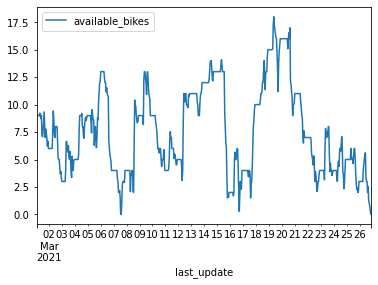

In [17]:
res_df.plot(y='available_bikes')

In [18]:
res_df['last_update'] = res_df.index
res_df.to_json(orient='records')

63636364,"available_bikes":11.3636363636,"last_update":1616086800000},{"number":41.0,"available_bike_stands":7.0909090909,"available_bikes":12.9090909091,"last_update":1616090400000},{"number":41.0,"available_bike_stands":7.0,"available_bikes":13.0,"last_update":1616094000000},{"number":41.0,"available_bike_stands":7.0,"available_bikes":13.0,"last_update":1616097600000},{"number":41.0,"available_bike_stands":5.6363636364,"available_bikes":14.3636363636,"last_update":1616101200000},{"number":41.0,"available_bike_stands":5.0,"available_bikes":15.0,"last_update":1616104800000},{"number":41.0,"available_bike_stands":5.0,"available_bikes":15.0,"last_update":1616108400000},{"number":41.0,"available_bike_stands":5.0,"available_bikes":15.0,"last_update":1616112000000},{"number":41.0,"available_bike_stands":5.0,"available_bikes":15.0,"last_update":1616115600000},{"number":41.0,"available_bike_stands":5.0,"available_bikes":15.0,"last_update":1616119200000},{"number":41.0,"available_bike_stands":